In [ ]:
# @title
from IPython.display import HTML

HTML("""
<div style="text-align:center;">
  <img src="https://cdn.sanity.io/images/kts928pd/production/6bfa934012816ade62378d0258592ed44ecd43b8-1140x620.png" width="65%">
</div>
""")


##***Walmart Dataset Overview😃🌟***
**Dataset Source:** [Walmart Dataset on Kaggle](https://www.kaggle.com/datasets/yasserh/walmart-dataset)  


# 🛒📊 Walmart Weekly Sales Dataset Columns Explained 💛💙

- 🏬 **Store**: Unique store ID. Each store has its own number 🆔
- 📅 **Date**: The date of the week for which sales are recorded (YYYY-MM-DD) 🗓️
- 💰 **Weekly_Sales**: Total weekly sales for each store (in $ or local currency) 💵
- 🎉 **Holiday_Flag**: Indicates if the week includes a public holiday (1 = holiday, 0 = not) 🎈

- 🌡️ **Temperature**: Average weekly temperature in the store’s area (°F / °C) ☀️❄️
- ⛽ **Fuel_Price**: Average weekly fuel price in the area (usually $/gallon) 💸
- 📈 **CPI**: Consumer Price Index in the area, reflects inflation trends 💹
- 📉 **Unemployment**: Weekly or monthly unemployment rate in the area 👷‍♂️🚫

In [ ]:
#! pip install ydata-profiling

In [ ]:
#from ydata_profiling import ProfileReport
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/content/Walmart.csv')
#profile=ProfileReport(df,title='Profiling Report')
#profile.to_file(output_file='output.html')
#profile

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106


In [ ]:
df.shape

(6435, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
df.dtypes

,0
Store,int64
Date,datetime64[ns]
Weekly_Sales,float64
Holiday_Flag,int64
Temperature,float64
Fuel_Price,float64
CPI,float64
Unemployment,float64


In [ ]:
pd.options.display.float_format = '{:.3f}'.format
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000,6435,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000
mean,23.000,2011-06-17 00:00:00,1046964.878,0.070,60.664,3.359,171.578,7.999
min,1.000,2010-02-05 00:00:00,209986.250,0.000,-2.060,2.472,126.064,3.879
25%,12.000,2010-10-08 00:00:00,553350.105,0.000,47.460,2.933,131.735,6.891
50%,23.000,2011-06-17 00:00:00,960746.040,0.000,62.670,3.445,182.617,7.874
75%,34.000,2012-02-24 00:00:00,1420158.660,0.000,74.940,3.735,212.743,8.622
max,45.000,2012-10-26 00:00:00,3818686.450,1.000,100.140,4.468,227.233,14.313
std,12.988,NaN,564366.622,0.255,18.445,0.459,39.357,1.876


In [ ]:
df['Date'].dt.day_name().value_counts(normalize=True)

,proportion
Date,
Friday,1.000


#Univariate Analysis

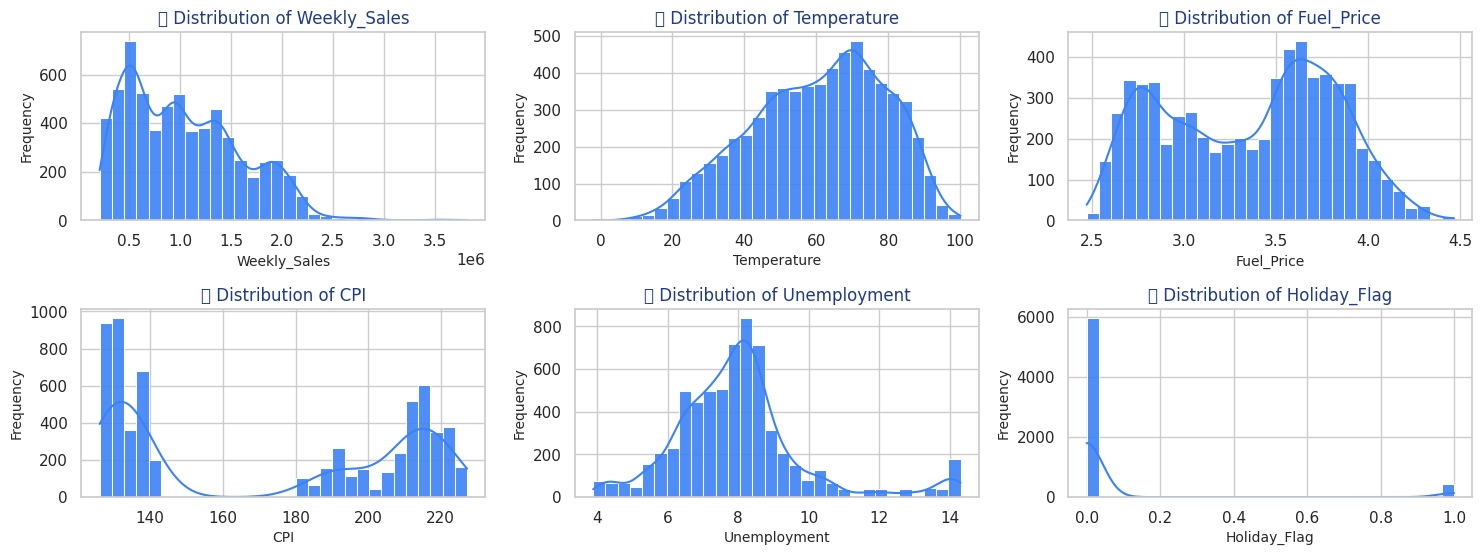

In [ ]:
# @title
from IPython.display import HTML
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# عرض الصورة في المنتصف
HTML("""
<div style="text-align:center;">
  <img src="https://cdn.sanity.io/images/kts928pd/production/6bfa934012816ade62378d0258592ed44ecd43b8-1140x620.png" width="65%">
</div>
""")

# ======================
# 💙 Single-color theme (Blue from image)
# ======================
main_color = "#3b82f6"  # درجة أزرق مستوحاة من الصورة

# الأعمدة الرقمية
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag']

# حجم الشكل
plt.figure(figsize=(15, 8))

# رسم histogram بنفس اللون
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(
        df[col],
        kde=True,
        bins=30,
        color=main_color,
        edgecolor='white',
        alpha=0.9
    )
    plt.title(f"📊 Distribution of {col}", fontsize=12, color="#1e3a8a")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frequency", fontsize=10)

plt.tight_layout()
plt.show()


### Univariate Analysis Summary

- **Weekly Sales:** Mostly low 📉, few very high 🚀  
- **Temperature:** Around average 🌡️  
- **Fuel Price:** Mostly low ⛽, few high 💸  
- **CPI:** Two peaks 📊  
- **Unemployment:** Mostly low 👷, few high 📈  
- **Holiday Flag:** Mostly non-holidays ❌🎉, few holidays ✅🎉


# Bivariate Analysis

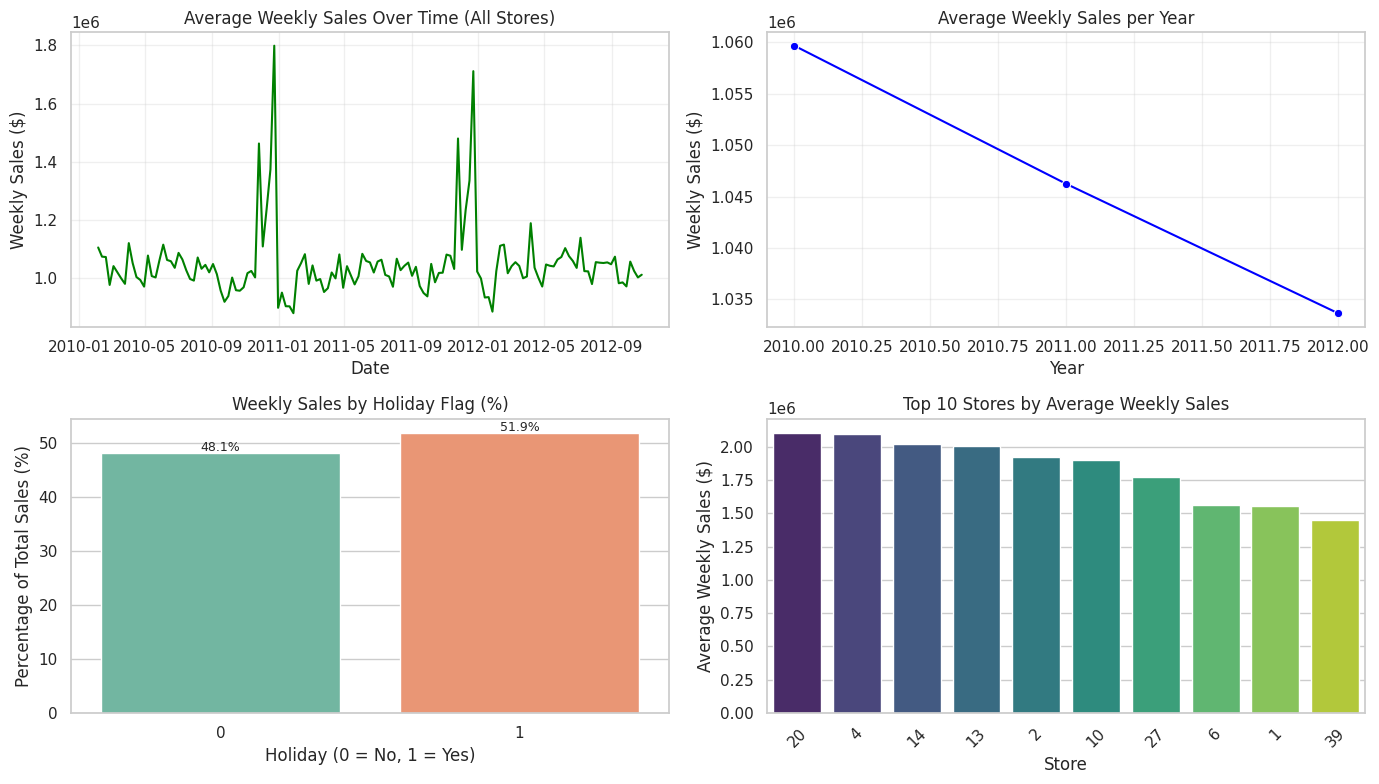

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# تجهيز البيانات
# ==========================
df['Year'] = df['Date'].dt.year

# حساب المتوسطات
avg_sales_date = df.groupby('Date')['Weekly_Sales'].mean().reset_index()
avg_sales_year = df.groupby('Year')['Weekly_Sales'].mean().reset_index()
avg_sales_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
percentages_holiday = 100 * avg_sales_holiday / avg_sales_holiday.sum()

# ترتيب المتاجر حسب متوسط المبيعات (تنازلي)
store_sales = (
    df.groupby('Store')['Weekly_Sales']
    .mean()
    .reset_index()
    .sort_values(by='Weekly_Sales', ascending=False)
    .head(10)
)

# ==========================
# إنشاء Subplots 2x2
# ==========================
sns.set(style="whitegrid", palette="Set2")
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# --------- 1️⃣ متوسط المبيعات لكل تاريخ أسبوعي ---------
sns.lineplot(x='Date', y='Weekly_Sales', data=avg_sales_date, ax=axes[0,0], color='green')
axes[0,0].set_title('Average Weekly Sales Over Time (All Stores)', fontsize=12)
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Weekly Sales ($)')
axes[0,0].grid(True, alpha=0.3)

# --------- 2️⃣ متوسط المبيعات لكل سنة ---------
sns.lineplot(x='Year', y='Weekly_Sales', data=avg_sales_year, marker='o', color='blue', ax=axes[0,1])
axes[0,1].set_title('Average Weekly Sales per Year', fontsize=12)
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Weekly Sales ($)')
axes[0,1].grid(True, alpha=0.3)

# --------- 3️⃣ Weekly Sales by Holiday Flag ---------
sns.barplot(x=percentages_holiday.index, y=percentages_holiday.values, palette='Set2', ax=axes[1,0])
axes[1,0].set_title('Weekly Sales by Holiday Flag (%)', fontsize=12)
axes[1,0].set_xlabel('Holiday (0 = No, 1 = Yes)')
axes[1,0].set_ylabel('Percentage of Total Sales (%)')
for p in axes[1,0].patches:
    axes[1,0].annotate(f'{p.get_height():.1f}%',
                       (p.get_x() + p.get_width()/2., p.get_height()+0.3),
                       ha='center', fontsize=9)

# --------- 4️⃣ Top 10 Stores by Average Weekly Sales ---------
sns.barplot(
    x='Store',
    y='Weekly_Sales',
    data=store_sales,
    palette='viridis',
    order=store_sales.sort_values(by='Weekly_Sales', ascending=False)['Store'],
    ax=axes[1,1]
)
axes[1,1].set_title('Top 10 Stores by Average Weekly Sales', fontsize=12)
axes[1,1].set_xlabel('Store')
axes[1,1].set_ylabel('Average Weekly Sales ($)')
axes[1,1].tick_params(axis='x', rotation=45)

# ✅ شيلنا الجزء اللي بيضيف الأرقام فوق الأعمدة

plt.tight_layout()
plt.show()

### Bivariate Analysis Summary

- **Average Weekly Sales Over Time:** Sales fluctuate over time ⏳📈, showing trends and seasonality 🌦️  
- **Average Weekly Sales per Year:** Slight downward trend from 2010 to 2012 📉  
- **Weekly Sales by Holiday Flag:** Holidays boost sales significantly 🎉🚀  
- **Top 10 Stores by Average Weekly Sales:** Store performance varies 🏬, with Store 20 & Store 4 leading 🥇


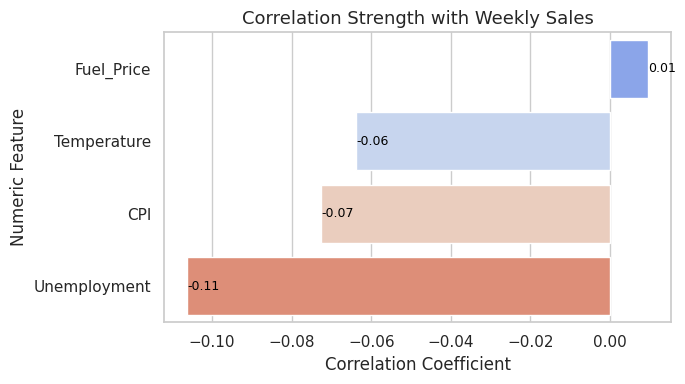

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==========================
# حساب معاملات الارتباط مع Weekly_Sales
# ==========================
numeric_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr_values = df[numeric_cols + ['Weekly_Sales']].corr()['Weekly_Sales'].drop('Weekly_Sales')

# تحويلها إلى DataFrame للعرض
corr_df = pd.DataFrame({'Feature': corr_values.index, 'Correlation': corr_values.values}).sort_values(by='Correlation', ascending=False)

# ==========================
# رسم Bar Plot يوضح قوة العلاقة
# ==========================
plt.figure(figsize=(7,4))
sns.barplot(x='Correlation', y='Feature', data=corr_df, palette='coolwarm', hue='Feature', legend=False)

# عناوين وتفاصيل
plt.title('Correlation Strength with Weekly Sales', fontsize=13)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Numeric Feature')

# إظهار القيم على الأعمدة
for index, value in enumerate(corr_df['Correlation']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left', fontsize=9, color='black')

plt.tight_layout()
plt.show()

**Weekly Sales Correlations:** Fuel Price ⛽📈 (0.01, ~0 effect), Temperature 🌡️📉 (-0.06), CPI 📊📉 (-0.07), Unemployment 👷📉 (-0.11, slightly stronger negative effect)


# Multivariate Analysis

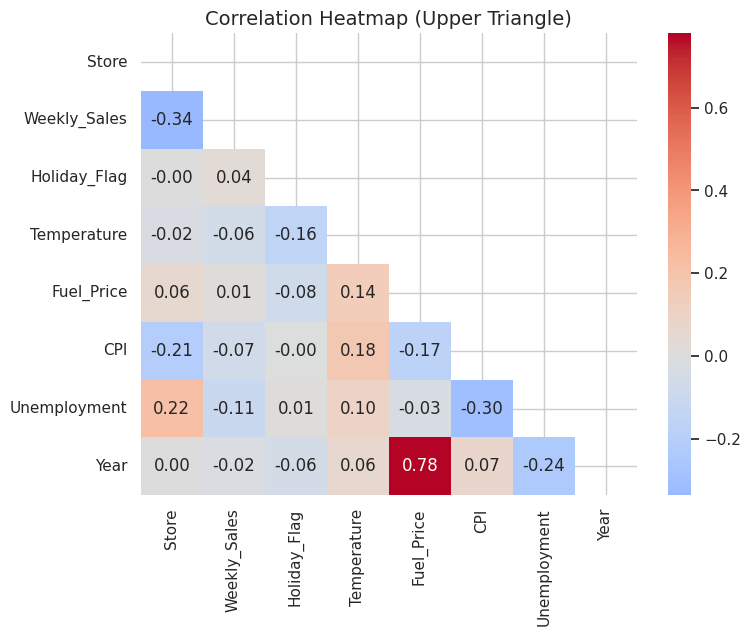

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# حساب مصفوفة الارتباط
corr = df.corr(numeric_only=True)

# إنشاء ماسك (mask) للنصف العلوي
mask = np.triu(np.ones_like(corr, dtype=bool))

# رسم heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap (Upper Triangle)', fontsize=14)
plt.show()

### 📊 Correlation Heatmap Insights

- **Weekly Sales:** Weak correlations with most features, except **Store** 🏬 (moderate negative) — store matters most.  
- **Fuel Price & Year:** Strong positive ⛽📈 (0.78) — fuel prices rose over time.  
- **Temperature & CPI:** Weak positive 🌡️📊 (0.18).  
- **CPI & Unemployment:** Moderate negative 📉👷 (-0.30) — higher CPI, lower unemployment.  
- **Store & CPI:** Moderate negative 🏬📊 (-0.21).  
- **Store & Unemployment:** Weak positive 🏬👷 (0.22).  

##Feature Engineering

In [ ]:
#df['Month'] = df['Date'].dt.month
#df['Year'] = df['Date'].dt.year

df['Sales_Lag_1'] = df['Weekly_Sales'].shift(1)
df['Rolling_Mean_3'] = df['Weekly_Sales'].rolling(window=3).mean()

df = df.dropna()

**Sales_Lag_1** = Previous week's sales 🕒

**Rolling_Mean_3** = Average of the last 3 weeks 🔄

Helps the model understand temporal patterns in sales 📊

In [ ]:
df.shape

(6433, 11)

In [ ]:
#df.sample(5)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Sales_Lag_1,Rolling_Mean_3
2,1,2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,2010,1641957.440,1632538.837
3,1,2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,2010,1611968.170,1554551.067
4,1,2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,2010,1409727.590,1525500.813
5,1,2010-03-12,1439541.590,0,57.790,2.667,211.381,8.106,2010,1554806.680,1468025.287
6,1,2010-03-19,1472515.790,0,54.580,2.720,211.216,8.106,2010,1439541.590,1488954.687


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Weekly_Sales', 'Date'], axis=1)
y = df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((4824, 9), (1609, 9))

In [ ]:
# =========================
# 🌟 Target Encoding for 'Store'
# =========================

# حساب متوسط المبيعات لكل متجر من بيانات التدريب
store_mean_map = X_train.join(y_train).groupby('Store')['Weekly_Sales'].mean()

# متوسط المبيعات العام
global_mean = y_train.mean()

# تطبيق الترميز على بيانات التدريب
X_train['Store'] = X_train['Store'].map(store_mean_map)

# تطبيق نفس الترميز على بيانات الاختبار، وتعويض المتاجر الجديدة بالمتوسط العام
X_test['Store'] = X_test['Store'].map(store_mean_map).fillna(global_mean)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **🟠 Regression Models (Polynomial, Ridge, Lasso & ElasticNet)**

In [ ]:
# @title
# ================================
# 📈  Regression Models Comparison
# ================================

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import time

# ================================
# 🌟 1️⃣ Create Polynomial Features
# ================================
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# ================================
# 🌟 2️⃣ Initialize Models
# ================================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "ElasticNet Regression": ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000)
}

# ================================
# 🌟 3️⃣ Train & Evaluate Models
# ================================
start_time = time.time()

for name, model in models.items():
    model.fit(X_train_poly, y_train)
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"{name} → 🧠 Train R²: {r2_train:.3f} | 🎯 Test R²: {r2_test:.3f}")

end_time = time.time()
print(f"\n⏰ Total Training Time: {(end_time - start_time):.2f} seconds")

Linear Regression → 🧠 Train R²: 0.989 | 🎯 Test R²: 0.985
Ridge Regression → 🧠 Train R²: 0.988 | 🎯 Test R²: 0.985
Lasso Regression → 🧠 Train R²: 0.988 | 🎯 Test R²: 0.985
ElasticNet Regression → 🧠 Train R²: 0.987 | 🎯 Test R²: 0.984

⏰ Total Training Time: 15.84 seconds


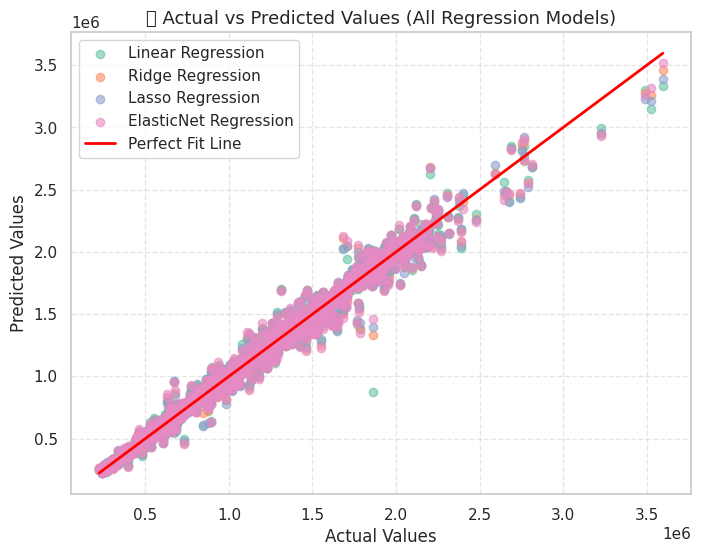

In [ ]:
# @title
# ================================
# 🍊 4️⃣ Visualize Actual vs Predicted Values (All Models in One Plot)
# ================================
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot each model’s predictions on the same axes
for name, model in models.items():
    y_pred_test = model.predict(X_test_poly)
    plt.scatter(y_test, y_pred_test, alpha=0.6, label=name)

# Add the perfect-fit regression line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Fit Line')

# Labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("🍊 Actual vs Predicted Values (All Regression Models)", fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# @title
import joblib

# Assuming 'models' dictionary contains the trained Linear Regression model
# (from cell fiYyaM3G8pMM)
linear_regression_model = models["Linear Regression"]

# Save the trained Linear Regression model
joblib.dump(linear_regression_model, "linear_regression_model.pkl")

print("✅ Linear Regression model saved successfully as 'linear_regression_model.pkl'!")

✅ Linear Regression model saved successfully as 'linear_regression_model.pkl'!


##🟡 **Support Vector Regression (SVR) Model**

In [ ]:
# @title
# ========================
# 🌟 1️⃣ Import Libraries
# ========================
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# ========================
# 🌟 2️⃣ Define Parameter Search Space
# ========================
# These are the hyperparameters and their ranges that RandomizedSearchCV will explore
param_dist = {
    'C': np.logspace(-2, 3, 10),          # Regularization parameter (from 0.01 to 1000)
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 1, 5)),  # Kernel coefficient
    'kernel': ['linear', 'rbf'],          # Kernel types
    'epsilon': [0.01, 0.1, 0.5, 1, 2]     # Epsilon in the loss function
}

# ========================
# 🌟 3️⃣ Initialize the Model
# ========================
svr = SVR()

# ========================
# 🌟 4️⃣ Start Timer
# ========================
start_time = time.time()

# ========================
# 🌟 5️⃣ Randomized Search
# ========================
# RandomizedSearchCV will try random combinations of parameters (faster than GridSearch)
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=50,           # Number of random combinations to try
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all CPU cores
    scoring='r2',        # Use R² as the performance metric
    verbose=2,           # Display progress during training
    random_state=42      # For reproducibility
)

# Fit the model to the training data
random_search.fit(X_train_scaled, y_train)

# ========================
# 🌟 6️⃣ End Timer
# ========================
end_time = time.time()
elapsed_time = end_time - start_time

# ========================
# 🌟 7️⃣ Best Parameters and Evaluation
# ========================
best_svr = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)
print(f"⏰ Training Time: {elapsed_time/60:.2f} minutes")

# Make predictions on training and testing data
y_pred_train = best_svr.predict(X_train_scaled)
y_pred_test = best_svr.predict(X_test_scaled)

# Calculate performance metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Display results
print(f"SVR Train R²: {r2_train:.3f}")
print(f"SVR Test R²: {r2_test:.3f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best Parameters: {'kernel': 'linear', 'gamma': np.float64(0.01), 'epsilon': 0.1, 'C': np.float64(1000.0)}
⏰ Training Time: 2.05 minutes
SVR Train R²: 0.948
SVR Test R²: 0.952


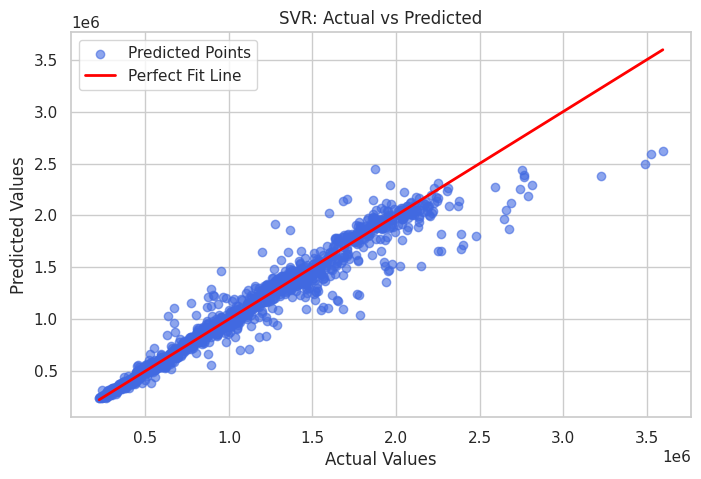

In [ ]:
# @title
# ========================
# 🌟 8️⃣ Visualize Actual vs Predicted Values (with regression line)
# ========================
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='royalblue', label='Predicted Points')

# Add regression line (perfect fit line)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Fit Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVR: Actual vs Predicted")
plt.legend()
plt.show()

In [ ]:
# @title
# ========================
# 🌟 9️⃣ Save the Trained Model
# ========================
import joblib

# Save the best trained SVR model
joblib.dump(best_svr, "best_svr_model.pkl")

print("✅ Model saved successfully as 'best_svr_model.pkl'!")

✅ Model saved successfully as 'best_svr_model.pkl'!


## 🔵 **KNeighborsRegressor Model Performance**

In [ ]:
# @title
# =========================
# 🌟 KNN Regressor Tuning to Reduce Overfitting
# =========================
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# =========================
# 🌟 Define Parameter Grid
# =========================
param_dist = {
    'n_neighbors': np.arange(3, 21),       # From 3 to 20 neighbors
    'weights': ['uniform', 'distance'],    # Uniform or distance weighting
    'p': [1, 2]                            # Manhattan (1) or Euclidean (2)
}

# =========================
# 🌟 Initialize KNN Model
# =========================
knn = KNeighborsRegressor()

# =========================
# 🌟 Randomized Search CV
# =========================
random_search = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist,
    n_iter=30,         # Number of random combinations
    cv=5,              # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# =========================
# 🌟 Fit on Training Data
# =========================
random_search.fit(X_train_scaled, y_train)

# =========================
# 🌟 Best Estimator & Parameters
# =========================
best_knn = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)

# =========================
# 🌟 Predictions
# =========================
y_pred_train = best_knn.predict(X_train_scaled)
y_pred_test = best_knn.predict(X_test_scaled)

# =========================
# 🌟 Metrics
# =========================
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"KNN Train R²: {r2_train:.3f}")
print(f"KNN Test R²: {r2_test:.3f}")
#print(f"KNN Test RMSE: {rmse:.3f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': np.int64(5)}
KNN Train R²: 1.000
KNN Test R²: 0.960


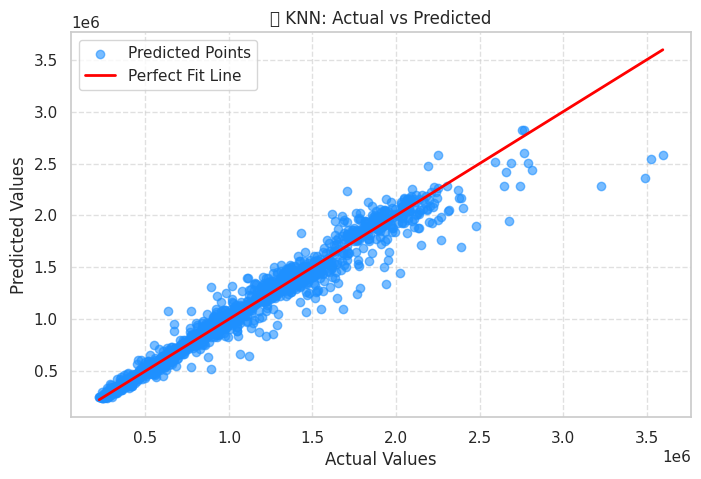

In [ ]:
# @title
# =========================
# 🌟 Visualization: Actual vs Predicted (KNN)
# =========================
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='dodgerblue', label='Predicted Points')

# Add perfect fit regression line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Fit Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("🔵 KNN: Actual vs Predicted")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# @title
import joblib

# save model
joblib.dump(best_knn, "best_knn_model.pkl")
print("💾 KNN model saved successfully as 'best_knn_model.pkl'")

💾 KNN model saved successfully as 'best_knn_model.pkl'


## **💛💙🟧 Regression Model Performance Comparison**

In [ ]:
# @title
# =========================
# 💛💙🟧 Regression Model Performance Comparison (Text Only)
# =========================
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import numpy as np

# =========================
# Prepare Polynomial Features
# =========================
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# =========================
# Train Linear Models
# =========================
linear_model = LinearRegression().fit(X_train_poly, y_train)
ridge_model = Ridge(alpha=1.0).fit(X_train_poly, y_train)
lasso_model = Lasso(alpha=0.001, max_iter=10000).fit(X_train_poly, y_train)
elastic_model = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000).fit(X_train_poly, y_train)

# =========================
# Predictions
# =========================
models = {
    "📘 Linear Regression": linear_model,
    "💙 Ridge Regression": ridge_model,
    "🟧 Lasso Regression": lasso_model,
    "💛 ElasticNet Regression": elastic_model
}

# Store results
results = []

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, mae, rmse))

# Add SVR and KNN if available
if 'y_pred_svr' in locals() and 'svr_r2_test' in locals():
    mae_svr = mean_absolute_error(y_test, y_pred_svr)
    rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
    results.append(("🔵 Support Vector Regression (SVR)", svr_r2_test, mae_svr, rmse_svr))
else:
    print("⚠️ SVR results not available.")

if 'y_pred_knn' in locals() and 'knn_r2_test' in locals():
    mae_knn = mean_absolute_error(y_test, y_pred_knn)
    rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
    results.append(("🟢 KNeighbors Regressor", knn_r2_test, mae_knn, rmse_knn))
else:
    print("⚠️ KNN results not available.")

# =========================
# Display Results Neatly
# =========================
print("\n💛💙🟧 Regression Models — Performance Summary\n")
print(f"{'Model':<40} {'R² Score':<10} {'MAE':<12} {'RMSE':<12}")
print("-" * 75)

for name, r2, mae, rmse in results:
    print(f"{name:<40} {r2:<10.3f} {mae:<12.3f} {rmse:<12.3f}")

print("\n✅ Comparison complete!")

⚠️ SVR results not available.
⚠️ KNN results not available.

💛💙🟧 Regression Models — Performance Summary

Model                                    R² Score   MAE          RMSE        
---------------------------------------------------------------------------
📘 Linear Regression                      0.985      43821.973    70864.426   
💙 Ridge Regression                       0.985      44802.684    70293.269   
🟧 Lasso Regression                       0.985      45152.243    70341.299   
💛 ElasticNet Regression                  0.984      45597.872    71642.722   

✅ Comparison complete!


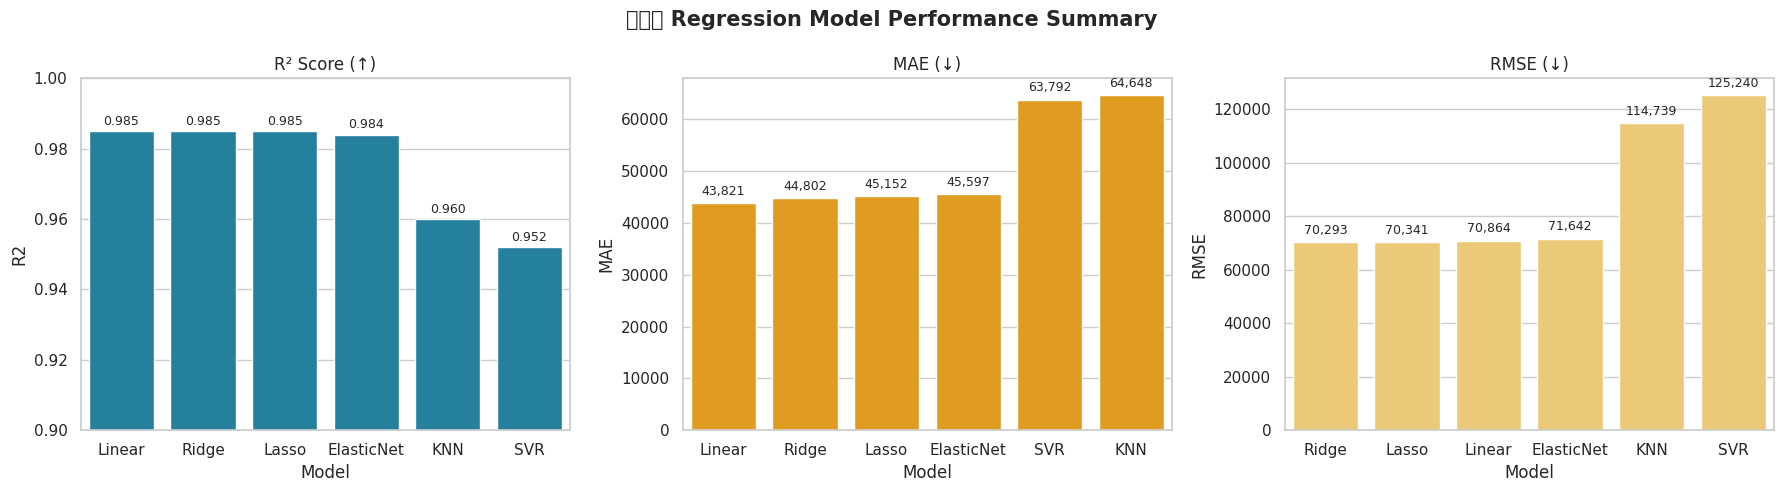

In [ ]:
# @title
# 🎯 Clean Sorted Regression Comparison (Each plot one color)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Performance data
data = {
    'Model': ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SVR', 'KNN'],
    'R2': [0.985, 0.985, 0.985, 0.984, 0.952, 0.960],
    'MAE': [43821, 44802, 45152, 45597, 63792, 64648],
    'RMSE': [70864, 70293, 70341, 71642, 125240, 114739]
}
df = pd.DataFrame(data)

# Sort values for each metric
r2_sorted = df.sort_values(by="R2", ascending=False)
mae_sorted = df.sort_values(by="MAE", ascending=True)
rmse_sorted = df.sort_values(by="RMSE", ascending=True)

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 💙 R² (Higher is better)
sns.barplot(x='Model', y='R2', data=r2_sorted, color="#118AB2", ax=axes[0])
axes[0].set_title('R² Score (↑)', fontsize=12)
axes[0].set_ylim(0.9, 1.0)
for i, v in enumerate(r2_sorted['R2']):
    axes[0].text(i, v + 0.001, f"{v:.3f}", ha='center', va='bottom', fontsize=9)

# 🟧 MAE (Lower is better)
sns.barplot(x='Model', y='MAE', data=mae_sorted, color="#FFA500", ax=axes[1])
axes[1].set_title('MAE (↓)', fontsize=12)
for i, v in enumerate(mae_sorted['MAE']):
    axes[1].text(i, v + 1000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

# 💛 RMSE (Lower is better)
sns.barplot(x='Model', y='RMSE', data=rmse_sorted, color="#FFD166", ax=axes[2])
axes[2].set_title('RMSE (↓)', fontsize=12)
for i, v in enumerate(rmse_sorted['RMSE']):
    axes[2].text(i, v + 2000, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.suptitle("💛💙🟧 Regression Model Performance Summary", fontsize=15, weight='bold')
plt.tight_layout()
plt.show()


### 📈 Regression Model Performance Insights

- **R² Score:** Linear, Ridge, Lasso ✅ 0.985 — explain ~98.5% of variance.  
  ElasticNet ⚡ 0.984 — slightly lower. SVR 🤖 0.952 & KNN 👫 0.960 — lower.  

- **MAE (Mean Absolute Error):** Linear, Ridge, Lasso ✅ ~43k-45k — predictions closer to actual sales.  
  SVR 🤖 & KNN 👫 ~63k-64k — less accurate.  

- **RMSE (Root Mean Squared Error):** Linear, Ridge, Lasso ✅ ~70k-71k — smaller overall errors.  
  SVR 🤖 & KNN 👫 ~114k-125k — larger errors.  

💡 **Insight:** Linear models with polynomial features outperform SVR and KNN. Among them, **Ridge Regression** slightly edges out others.